# Rejection Reasons Graphs

This notebook accompanies the Python notebook, and uses `ggplot` to make some nice graphs.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [6]:
# Give me wider plots, please
options(repr.plot.width = 14, repr.plot.height = 7)

Make platform be a comprehensible string, add log edit count and then turn that into a bucket by flooring it.

In [73]:
rejection_reasons <- read_csv('datasets/rejection-reasons-2022-03-04.csv',
                              col_types = 'clci') %>%
    mutate(platform = ifelse(is_mobile, 'mobile', 'desktop'),
           log_tagged_edit_count = log2(1 + tagged_edit_count),
           tagged_edit_count_bucket = floor(log_tagged_edit_count))

In [74]:
summary(rejection_reasons$log_tagged_edit_count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.585   2.651   4.248   7.983 

In [ ]:
head(rejection_reasons)

In [ ]:
rejection_reasons %>%
    filter(wiki == 'bnwiki') %>%
    group_by(platform, tagged_edit_count_bucket, rejection_reason) %>%
    tally() %>%
    mutate(per_group = sum(n)) %>%
    ungroup() %>%
    mutate(perc = 100 * n / per_group, prob = n / per_group)

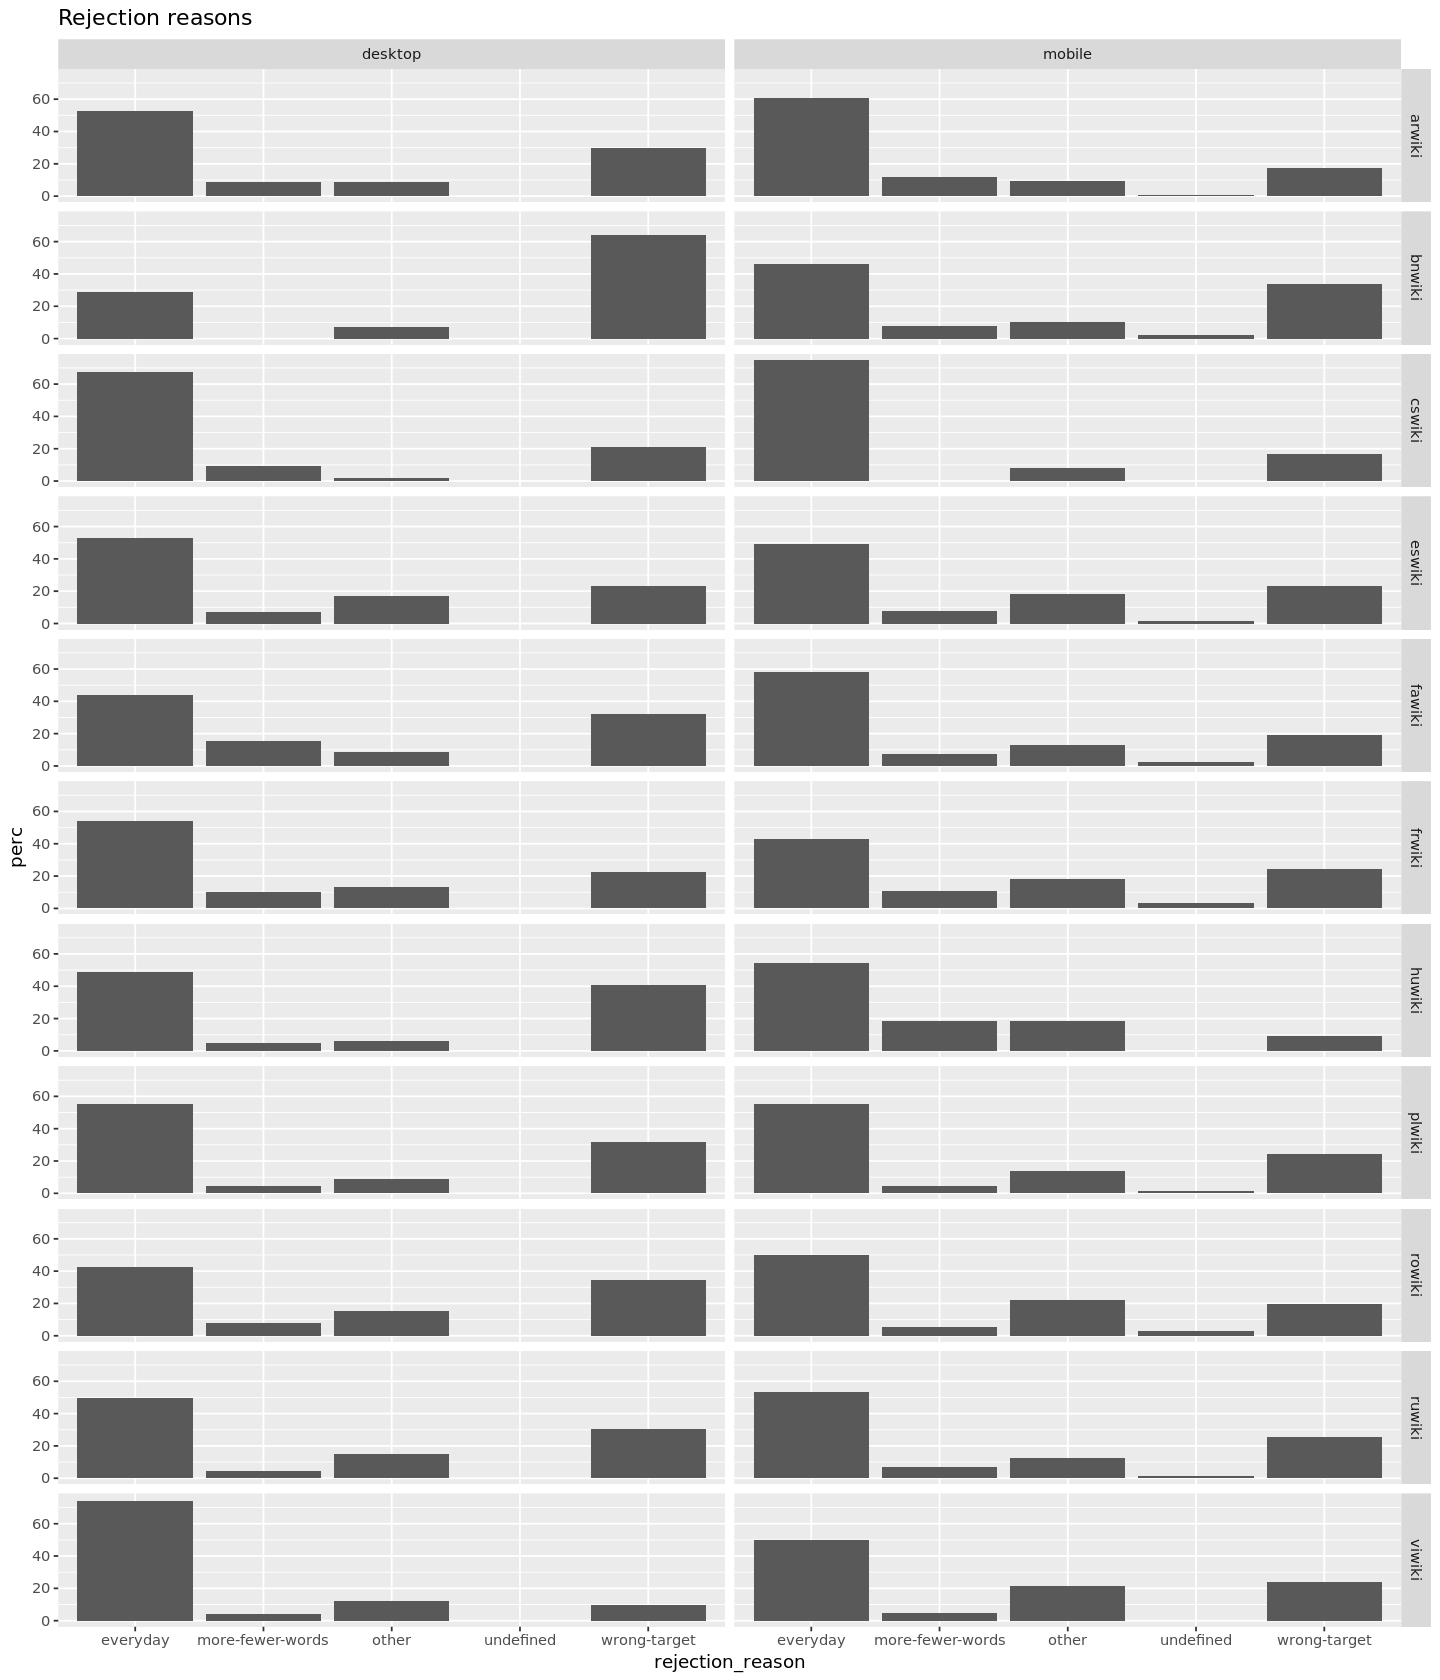

In [76]:
options(repr.plot.width = 12, repr.plot.height = 14)
rejection_reasons %>%
    group_by(wiki, platform, rejection_reason) %>%
    tally() %>%
    mutate(per_group = sum(n)) %>%
    ungroup() %>%
    mutate(perc = 100 * n / per_group, prob = n / per_group) %>%
    ggplot(aes(x = rejection_reason, y = perc)) +
        labs(title = 'Rejection reasons') +
        geom_col(position = 'dodge2') +
        facet_grid(wiki ~ platform)

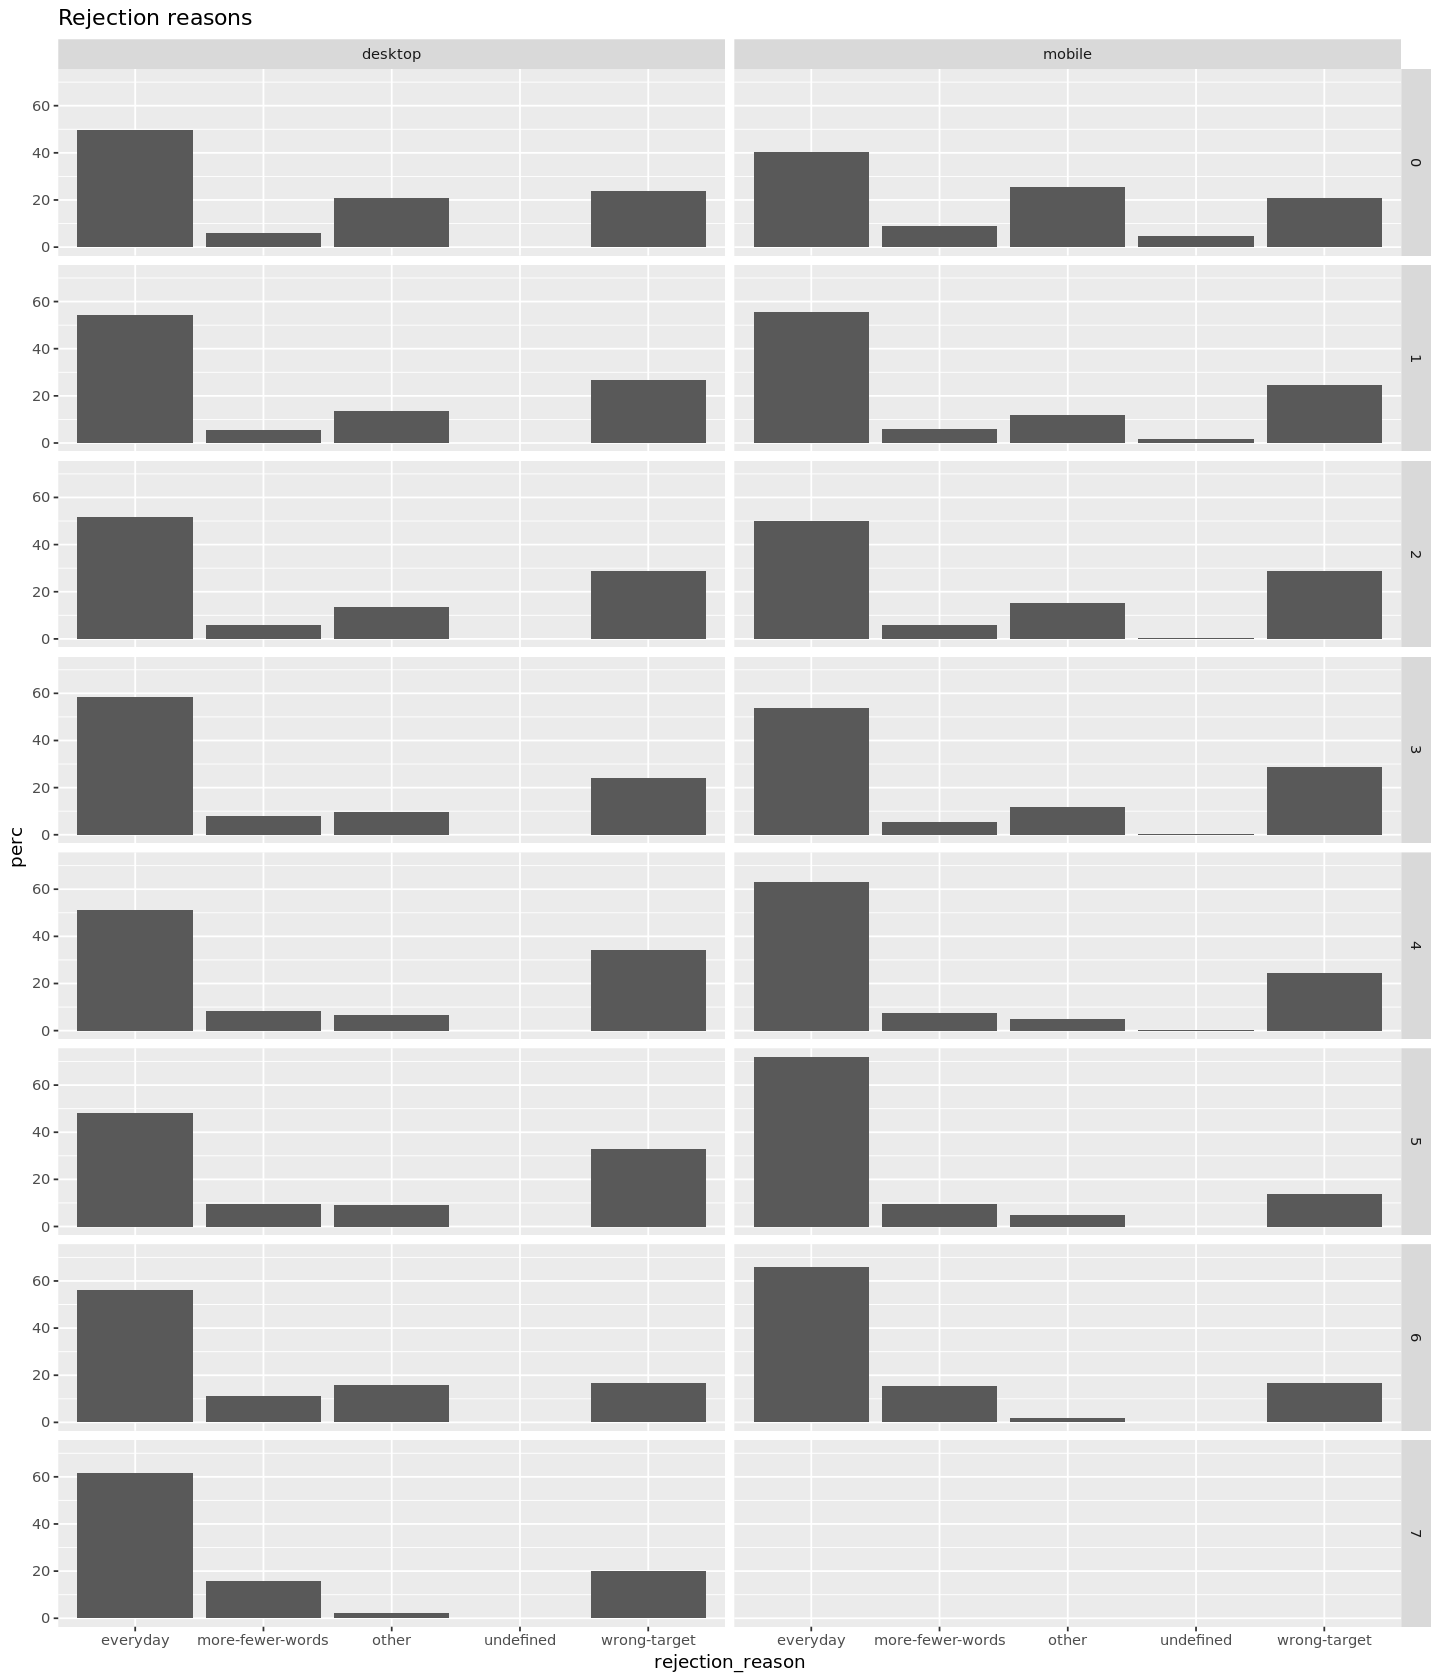

In [77]:
options(repr.plot.width = 12, repr.plot.height = 14)
rejection_reasons %>%
    group_by(platform, tagged_edit_count_bucket, rejection_reason) %>%
    tally() %>%
    mutate(per_group = sum(n)) %>%
    ungroup() %>%
    mutate(perc = 100 * n / per_group, prob = n / per_group) %>%
    ggplot(aes(x = rejection_reason, y = perc)) +
        labs(title = 'Rejection reasons') +
        geom_col(position = 'dodge2') +
        facet_grid(tagged_edit_count_bucket ~ platform)

## Saving Graphs

In [71]:
for(wiki_db in unique(rejection_reasons$wiki)) {
    rejection_reasons %>%
        filter(wiki == wiki_db) %>%
        group_by(platform, tagged_edit_count_bucket, rejection_reason) %>%
        tally() %>%
        mutate(per_group = sum(n)) %>%
        ungroup() %>%
        mutate(perc = 100 * n / per_group, prob = n / per_group) %>%
        ggplot(aes(x = rejection_reason, y = perc)) +
            labs(title = paste(wiki_db, '– Rejection reasons')) +
            geom_col(position = 'dodge2') +
            facet_grid(tagged_edit_count_bucket ~ platform)
    ggsave(paste0('rejection-reasons-platform-tenure-', wiki_db, '.png'), path = 'graphs',
           width = 12, height = 14, units = "in", dpi = "screen")
    }

It turned out that these didn't reveal much. There's an indication that users move away from using "Other" as their experience grows. We also have few data points for more experienced users.

Suggested next step:

* Loosen the restriction on data, let's look at user behaviour across the first four weeks after registration.

If that doesn't give us much more interesting patterns, we'll wrap up what we have.

## Loosened Time Restriction

It didn't give us a lot more information. We get some signal in the form of more experienced users being able to make edits, however it didn't significantly change things. At this point, I think providing an overview table of number and percentage of rejections split by platform makes most sense, although the reasons are going to be very similar across both of them.

In [80]:
rejection_reasons %>%
    group_by(platform, rejection_reason) %>%
    tally() %>%
    mutate(per_group = sum(n)) %>%
    ungroup() %>%
    mutate(perc = 100 * n / per_group, prob = n / per_group)

platform,rejection_reason,n,per_group,perc,prob
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
desktop,everyday,2732,5155,52.997090,0.52997090
desktop,more-fewer-words,378,5155,7.332687,0.07332687
desktop,other,668,5155,12.958293,0.12958293
desktop,wrong-target,1377,5155,26.711930,0.26711930
mobile,everyday,1835,3443,53.296544,0.53296544
mobile,more-fewer-words,271,3443,7.871043,0.07871043
mobile,other,484,3443,14.057508,0.14057508
mobile,undefined,62,3443,1.800755,0.01800755
mobile,wrong-target,791,3443,22.974150,0.22974150
